In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [3]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')#or[1 - True Negative Rate]
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    sns.set(font_scale=2)
    plt.show()

    return None

In [4]:
c_data = pd.read_csv('creditcard.csv')
c_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
c_data.drop_duplicates(keep='first', inplace=True)

In [6]:
c_data.shape

(283726, 31)

# Sampling

In [7]:
from sklearn.utils import resample

In [8]:
#separate minority and majority classes
real_cases = c_data[c_data.Class==0]
fraud_cases = c_data[c_data.Class==1]

In [9]:
real_cases.shape

(283253, 31)

In [10]:
fraud_cases.shape

(473, 31)

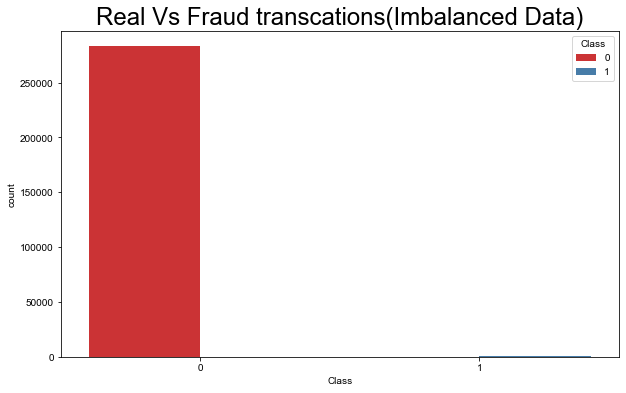

In [11]:
plt.figure(figsize = (10,6))
sns.countplot(c_data['Class'], hue=c_data['Class'], palette = "Set1")
sns.set(font_scale=2)
plt.title('Real Vs Fraud transcations(Imbalanced Data)');

In [12]:
#we can see here our dataset is fully imbalanced. so we need to balaned our dataset first. So, we use undersampling method.

# undersampling

In [13]:
#undersample sample
fraud_undersampled = resample(real_cases,
                            replace=True, # sample with replacement
                            n_samples=len(fraud_cases),# match number in majority class
                            random_state=27) #reproducible results

#combine majority and upsampled minority
undersampled = pd.concat([fraud_cases, fraud_undersampled])

In [14]:
# check new class counts
undersampled.Class.value_counts()

1    473
0    473
Name: Class, dtype: int64

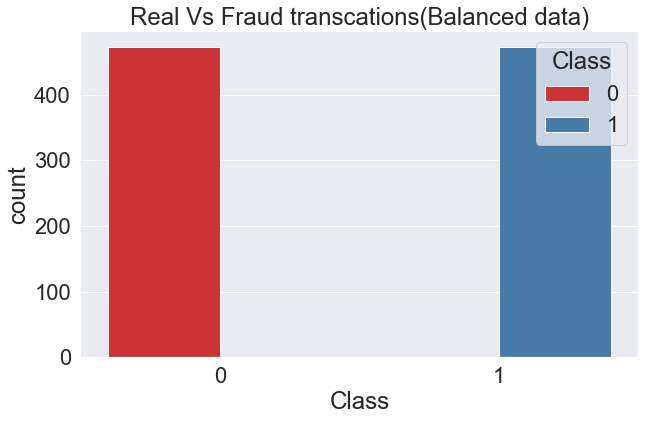

In [15]:
plt.figure(figsize = (10,6))
sns.countplot(undersampled.Class, hue=undersampled.Class, palette = "Set1")
sns.set(font_scale=2)
plt.title('Real Vs Fraud transcations(Balanced data)');

In [16]:
#Now we can see our data is fully balanced

## splitting our dataset into dependent and independent feature

In [17]:
# Import library
import sklearn
from sklearn.model_selection import train_test_split

### Undersampling apply

In [18]:
#Putting feature variables into X
X=undersampled.drop('Class', axis=1)
X.shape

(946, 30)

In [19]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00


In [20]:
# Putting target variable to y
y=undersampled.Class
y.shape

(946,)

In [21]:
# Splitting data into train and test set 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=1234)

In [22]:
print('Total number of train data of feature variable:', X_train.shape)
print('Total number of test data of feature variable:', X_test.shape)

Total number of train data of feature variable: (709, 30)
Total number of test data of feature variable: (237, 30)


In [23]:
print('Total number of train data of target variable:', y_train.shape)
print('Total number of test data of target variable:', y_test.shape)

Total number of train data of target variable: (709,)
Total number of test data of target variable: (237,)


## # # Feature Scaling
All columns of dataset are already scaled by the PCA transformation, so we need to scale only the Amount column

## Standardization method

In [24]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [25]:
#before scaling amount data be like
c_data.Amount.head()

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64

In [26]:
# Instantiate the Scaler
scaler = StandardScaler()

## Scalling the train set

In [27]:
# Fit the train data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train['Amount'].head()

145446   -0.421692
123270   -0.438317
150654   -0.442282
221018    0.839585
255317   -0.380913
Name: Amount, dtype: float64

## Scalling the test set

In [28]:
# Only Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test['Amount'].head()

231978   -0.410276
173152   -0.382435
149442    0.794119
44091    -0.041779
42769     0.031568
Name: Amount, dtype: float64

# Checking the Skewness

In [29]:
# Listing the columns
cols = X_train.columns

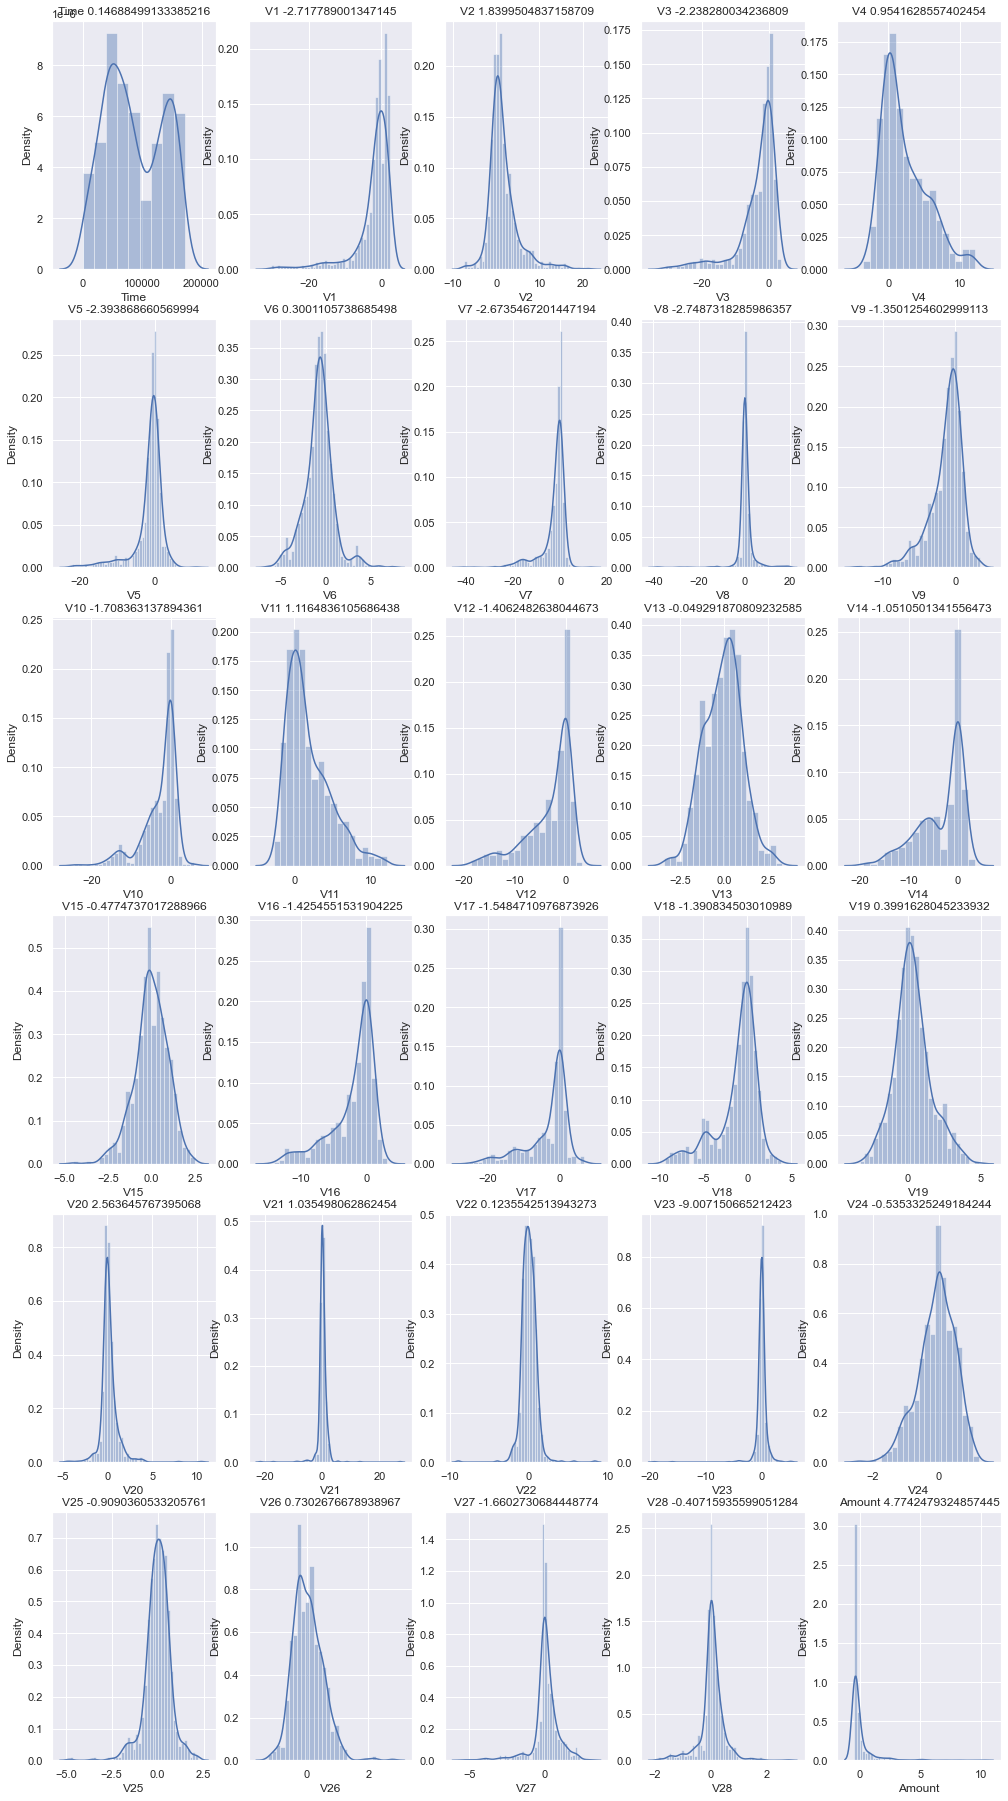

In [30]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,32))
sns.set(font_scale=1)
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

## # Reduce skeweness with PowerTransformer

In [31]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

In [32]:
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

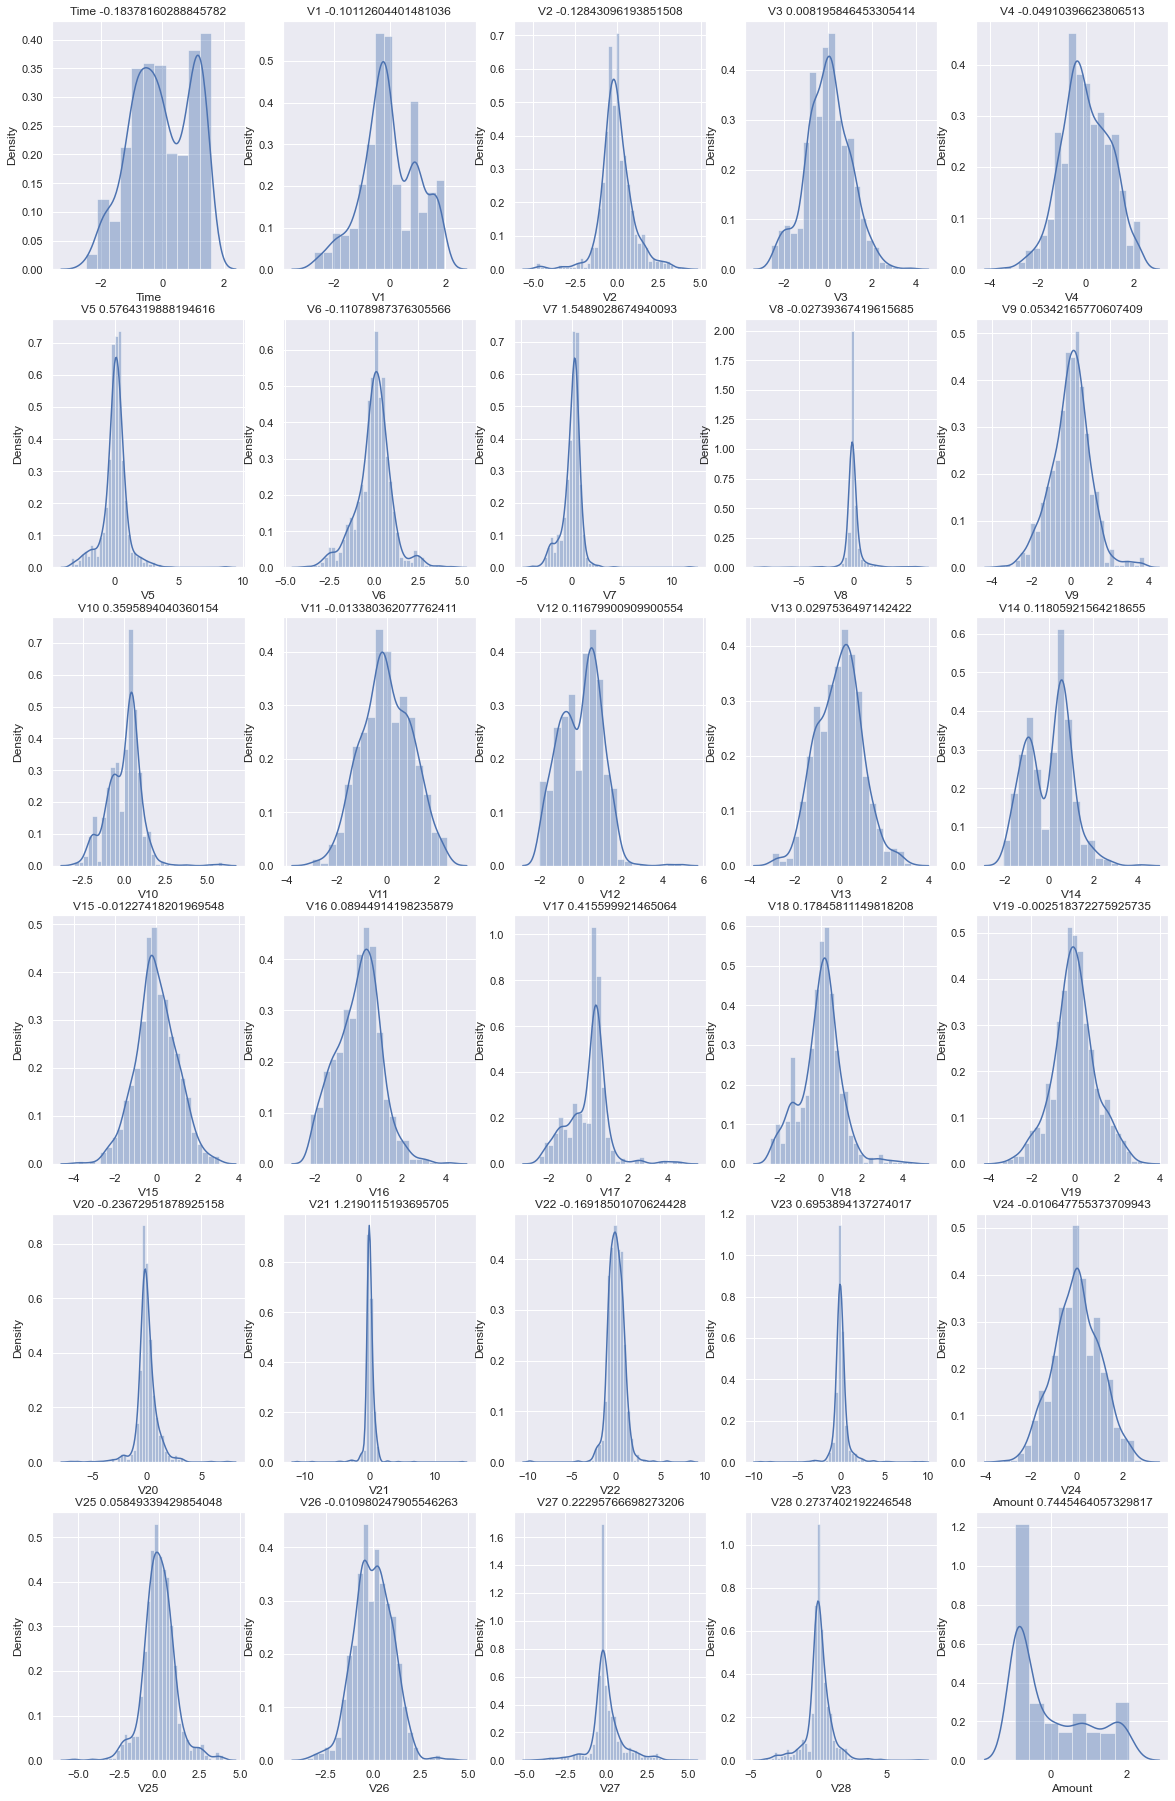

In [33]:
# Transform the test set
X_test[cols] = pt.transform(X_test)
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(20,32))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

# Model

# # Logistic regression

In [34]:
# C is the the inverse of regularization strength in Logistic Regression. 
#Higher values of C correspond to less regularization.

In [35]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [36]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

In [37]:
# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 



In [38]:
# Fit the model
model_cv.fit( X_train, y_train);

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [39]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9774222670136499 at C = 0.1


# # # Logistic regression with optimal C

In [40]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.1) 

# Train Data

In [41]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit( X_train, y_train)

In [42]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

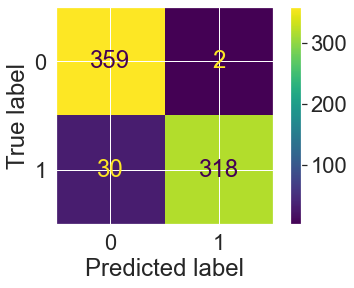

In [43]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
sns.set(font_scale=2)
disp.plot()
plt.show()

In [44]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [45]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

Accuracy:- 0.9548660084626234


In [46]:
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.9137931034482759


In [47]:
# Specificity
print("Specificity:-", TN / float(TN+FP))

Specificity:- 0.9944598337950139


In [48]:
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

F1-Score:- 0.9520958083832336


In [49]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       361
           1       0.99      0.91      0.95       348

    accuracy                           0.95       709
   macro avg       0.96      0.95      0.95       709
weighted avg       0.96      0.95      0.95       709



In [50]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

In [51]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9864998248798038

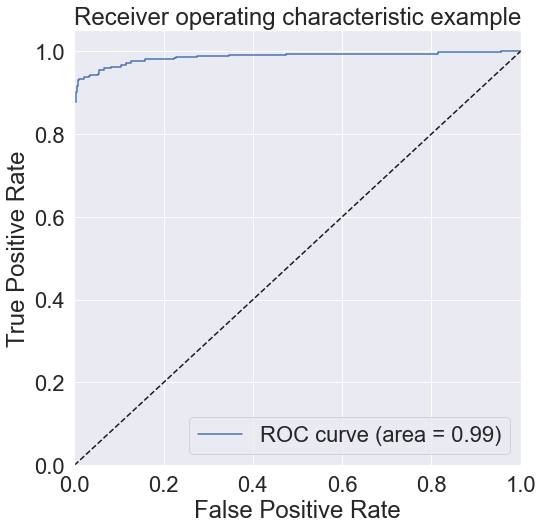

In [52]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

# Test set

In [53]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

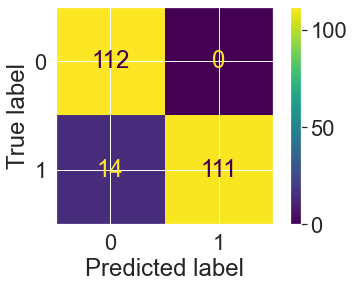

In [54]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
sns.set(font_scale=2)
disp.plot()
plt.show()

In [55]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [56]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

Accuracy:- 0.9409282700421941


In [57]:
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.888


In [58]:
# Specificity
print("Specificity:-", TN / float(TN+FP))

Specificity:- 1.0


In [59]:
# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

F1-Score:- 0.940677966101695


In [60]:
#classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       112
           1       1.00      0.89      0.94       125

    accuracy                           0.94       237
   macro avg       0.94      0.94      0.94       237
weighted avg       0.95      0.94      0.94       237



## Roc on the test set

In [61]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

In [62]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.980642857142857

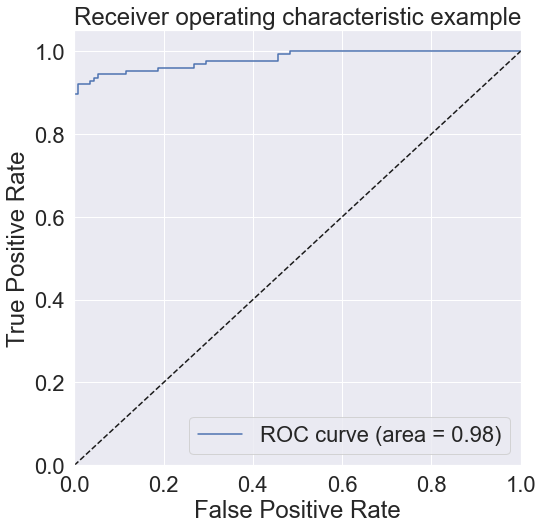

In [63]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# # -------------------------- FINISH ----------------------------#

### # -------------------------- FINISH ----------------------------#

# Decision tree

In [64]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [65]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

In [66]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

In [67]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [68]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9592040111142776
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


## #  Model with optimal hyperparameters

In [69]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

## Train set

In [70]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

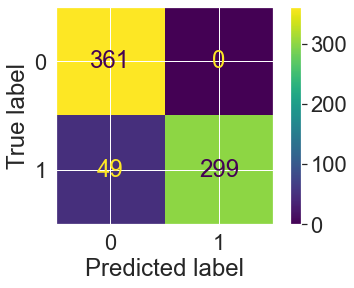

In [71]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
sns.set(font_scale=2)
disp.plot()
plt.show()

In [72]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [73]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

Accuracy:- 0.9308885754583921


In [74]:
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.8591954022988506


In [75]:
# Specificity
print("Specificity:-", TN / float(TN+FP))

Specificity:- 1.0


In [76]:
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

F1-Score:- 0.9242658423493045


In [77]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       361
           1       1.00      0.86      0.92       348

    accuracy                           0.93       709
   macro avg       0.94      0.93      0.93       709
weighted avg       0.94      0.93      0.93       709



In [78]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [79]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.97867911612061

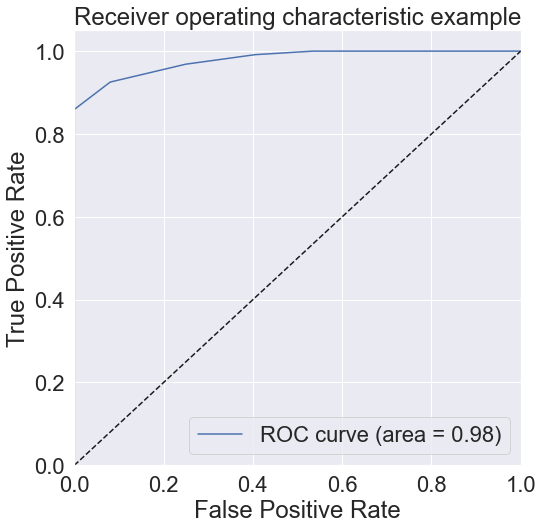

In [80]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

## Test set

In [81]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

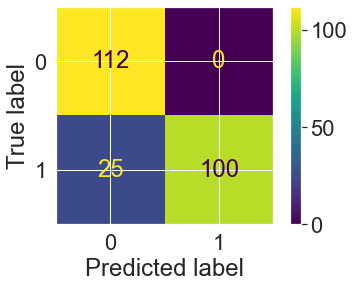

In [82]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
sns.set(font_scale=2)
disp.plot()
plt.show()

In [83]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

Accuracy:- 0.8945147679324894


In [85]:
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.8


In [86]:
# Specificity
print("Specificity:-", TN / float(TN+FP))

Specificity:- 1.0


In [87]:
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

F1-Score:- 0.9242658423493045


In [88]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       112
           1       1.00      0.80      0.89       125

    accuracy                           0.89       237
   macro avg       0.91      0.90      0.89       237
weighted avg       0.91      0.89      0.89       237



In [89]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [90]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9519642857142858

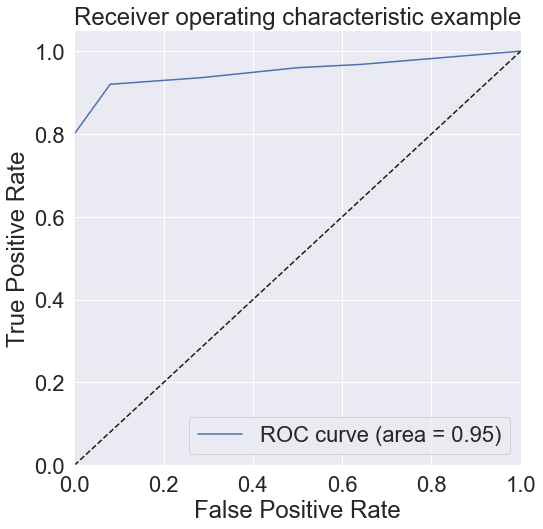

In [91]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# -----------------------------Finish------------------

## -----------------------------Finish------------------

# Random Forest

In [92]:
### Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [93]:
### Using grid search cv to find the best parameters.
param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}

In [94]:
rf_cv = GridSearchCV(RandomForestClassifier(),
                     param, 
                     cv=5,
                     scoring='roc_auc', 
                     n_jobs=-1)

In [95]:
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 7, 9],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='roc_auc')

In [96]:
print("tuned hpyerparameters :(best parameters) ",rf_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'max_depth': 9, 'n_estimators': 50}


In [98]:
rf = RandomForestClassifier(max_depth=9, n_estimators=50)
random_forest = rf.fit(X_train,y_train)

## Train set

In [99]:
# Predictions on the train set
y_train_pred = random_forest.predict(X_train)

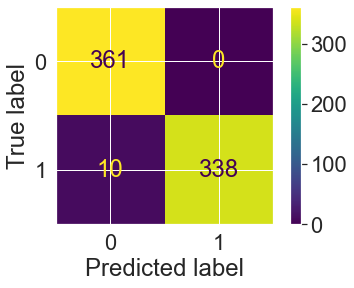

In [115]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
sns.set(font_scale=2)
disp.plot()
plt.show()

In [116]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [118]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

Accuracy:- 0.9858956276445698


In [120]:
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.9712643678160919


In [121]:
# Specificity
print("Specificity:-", TN / float(TN+FP))

Specificity:- 1.0


In [123]:
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

F1-Score:- 0.9854227405247813


In [124]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       361
           1       1.00      0.97      0.99       348

    accuracy                           0.99       709
   macro avg       0.99      0.99      0.99       709
weighted avg       0.99      0.99      0.99       709



In [125]:
# Predicted probability
y_train_pred_proba = random_forest.predict_proba(X_train)[:,1]

In [127]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9998885598751871

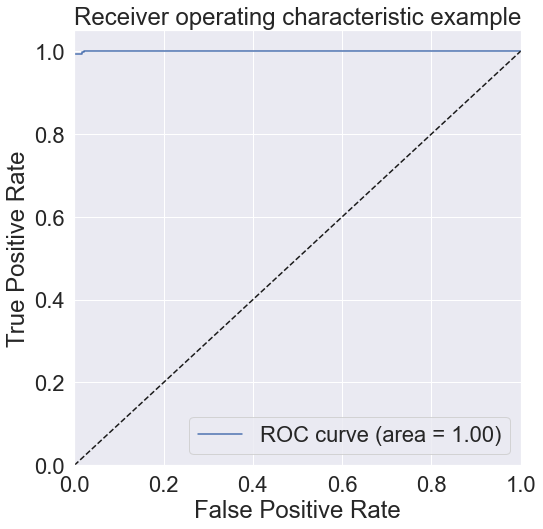

In [128]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

## Test set

In [129]:
# Predictions on the test set
y_test_pred = random_forest.predict(X_test)

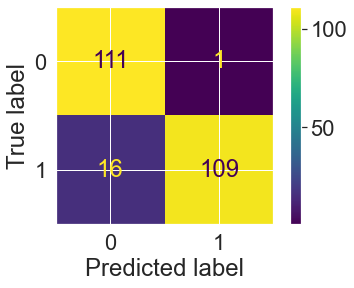

In [130]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
sns.set(font_scale=2)
disp.plot()
plt.show()

In [131]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [132]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

Accuracy:- 0.9282700421940928


In [133]:
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.872


In [134]:
# Specificity
print("Specificity:-", TN / float(TN+FP))

Specificity:- 0.9910714285714286


In [142]:
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

F1-Score:- 0.9854227405247813


In [143]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       112
           1       0.99      0.87      0.93       125

    accuracy                           0.93       237
   macro avg       0.93      0.93      0.93       237
weighted avg       0.94      0.93      0.93       237



In [144]:
# Predicted probability
y_test_pred_proba = random_forest.predict_proba(X_test)[:,1]

In [146]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9760714285714286

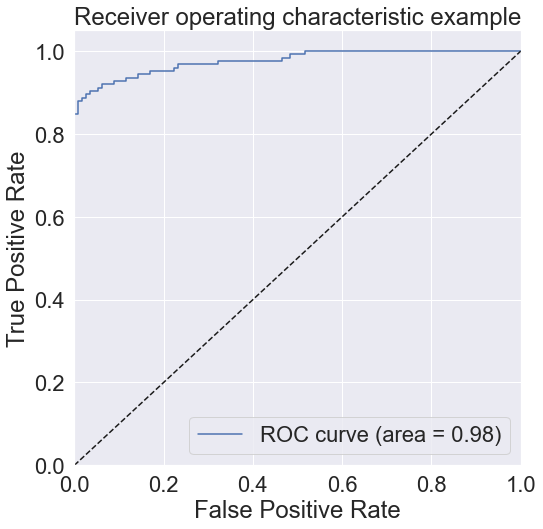

In [147]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# -----------------------Finish--------------

## ----------------------------Finish--------------

# XGBoost

In [ ]:
#import libraries

from xgboost import XGBClassifier
from scipy import stats

In [151]:
# Using grid search cv to find the best parameters.
param_xgb_clf = {'n_estimators': [130,140,150],
              'max_depth': [3, 5, 7],
               'min_child_weight':[1,2,3]
             } 

In [152]:
xgb_cv = GridSearchCV(XGBClassifier(),
                      param_xgb_clf,
                      cv=3,
                      scoring='roc_auc',
                      n_jobs=-1)

In [153]:
xgb_cv.fit(X_train,y_train)

[21:54:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [154]:
print("tuned hpyerparameters :(best parameters) ",xgb_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 150}


In [155]:
#Fitting the model with best parameters.

xgbst = XGBClassifier(max_depth=3, min_child_weight=2, n_estimators=150)

In [157]:
xgb_imb_model = xgbst.fit(X_train,y_train)

[22:09:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# Train set

In [158]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

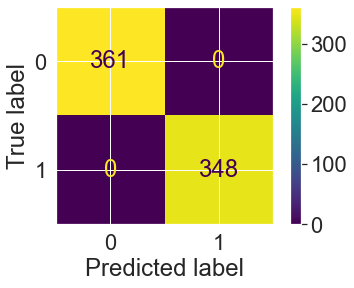

In [159]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
sns.set(font_scale=2)
disp.plot()
plt.show()

In [160]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [161]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

Accuracy:- 1.0


In [162]:
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 1.0


In [163]:
# Specificity
print("Specificity:-", TN / float(TN+FP))

Specificity:- 1.0


In [164]:
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

F1-Score:- 1.0


In [165]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       361
           1       1.00      1.00      1.00       348

    accuracy                           1.00       709
   macro avg       1.00      1.00      1.00       709
weighted avg       1.00      1.00      1.00       709



In [166]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [167]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

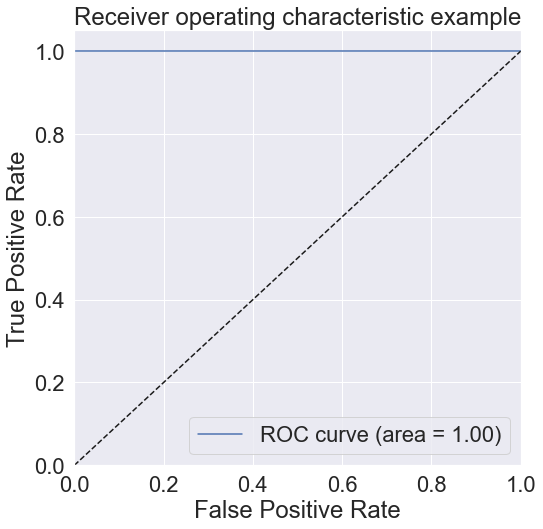

In [168]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

# Test set

In [169]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

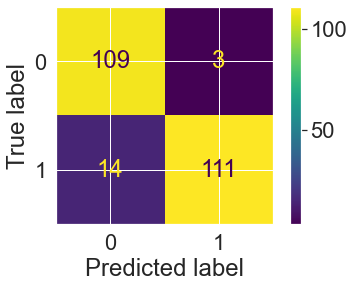

In [170]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
sns.set(font_scale=2)
disp.plot()
plt.show()

In [171]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [172]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

Accuracy:- 0.9282700421940928


In [173]:
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.888


In [174]:
# Specificity
print("Specificity:-", TN / float(TN+FP))

Specificity:- 0.9732142857142857


In [175]:
# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

F1-Score:- 0.9288702928870293


In [176]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       112
           1       0.97      0.89      0.93       125

    accuracy                           0.93       237
   macro avg       0.93      0.93      0.93       237
weighted avg       0.93      0.93      0.93       237



In [177]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [178]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9778571428571429

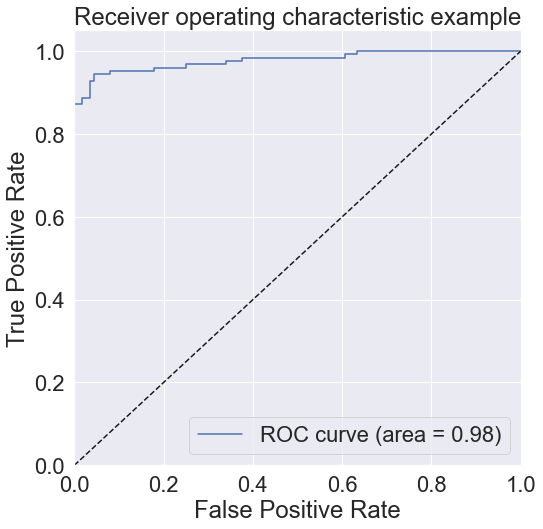

In [179]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)